## Lesson-01 通过构建线性回归-理解Loss函数-梯度下降与函数拟合

## Load Dataset

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
X, y = data['data'], data['target']

In [3]:
X, y = data['data'], data['target']

In [4]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [5]:
y[1]

21.6

In [6]:
X.shape

(506, 13)

In [7]:
len(y)

506

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

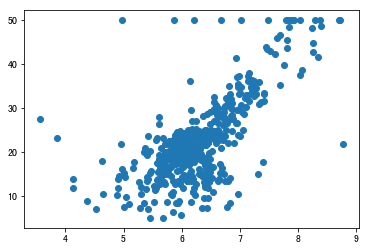

In [10]:
plt.scatter(X[:, 5], y)

## 目标：就是要找一个“最佳”的直线，来拟合卧室和房价的关系

In [11]:
import random 

In [12]:
k, b = random.randint(-100, 100), random.randint(-100, 100)

def func(x):
    return k*x + b

In [13]:
X_rm = X[:, 5]

In [14]:
y_hat = [func(x) for x in X_rm]

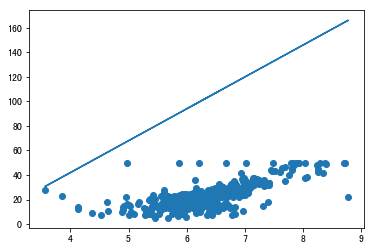

In [15]:
plt.scatter(X[:, 5], y)
plt.plot(X_rm, y_hat)

## 随机画了一根直线，结果发现，离得很远？🙁

In [16]:
def draw_room_and_price():
    plt.scatter(X[:, 5], y)

the random k : -75, b: -37


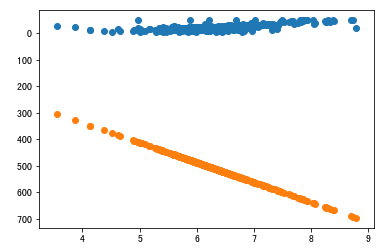

In [17]:
def price(x, k, b):
    return k*x + b

k, b = random.randint(-100, 100), random.randint(-100, 100)

price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
print('the random k : {}, b: {}'.format(k, b))
draw_room_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 目标是想找到最“好”的K和b？ 

## 我们需要一个标准去衡量这个东西到底好不好

y_true, $\hat{y}$

衡量y_true, $\hat{y}$ -> 损失函数

In [18]:
y_true = [1, 4, 1, 4,1, 4, 1,4]
y_hat = [2, 3, 1, 4, 1, 41, 31, 3]

## L1-Loss

$$ loss = \frac{1}{n} \sum_{i}^{n}| y_{true-i} - \hat{y_i} | $$

In [19]:
y_ture = [3, 4, 4]
y_hat_1 = [1, 1, 4]
y_hat_2 = [3, 4, 0]

## L1-Loss 值是多少呢？ |3 - 1| + |4-1|+ |4 -4| = 2 + 2 + 0 = 4

## $\hat{y_2}$ L1-Loss |3-3| + |4-4|+|4-0| = 4

$$ loss = \frac{1}{n} \sum_{i}^{n} (y_i - \hat{y_i}) ^ 2 $$

In [20]:
def loss(y, y_hat):
    sum_ = sum([(y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)])
    return sum_ / len(y)

In [21]:
y_ture = [3, 4, 4]
y_hat_1 = [1, 1, 4]
y_hat_2 = [3, 4, 0]

print(loss(y_ture, y_hat_1))
print(loss(y_ture, y_hat_2))

4.333333333333333
5.333333333333333


the random k : -63, b: 71
The Loss of k: -63, b: 71 is 123336.7504149071


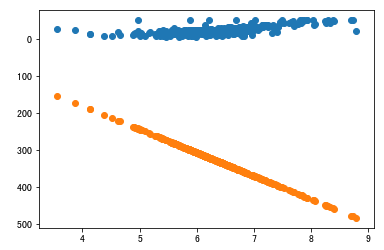

In [22]:
def price(x, k, b):
    return k*x + b

k, b = random.randint(-100, 100), random.randint(-100, 100)

price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
print('the random k : {}, b: {}'.format(k, b))
draw_room_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

cost = loss(list(y), price_by_random_k_and_b)

print('The Loss of k: {}, b: {} is {}'.format(k, b, cost))

## Loss 一件事情你只要知道如何评价它好与坏 基本上就完成了一般了工作了

## 最简单的方法，我们随机生成若干组k和b，然后找到最佳的一组k和b

In [23]:
def price(x, k, b):
    return k*x + b

trying_times = 5000

best_k, best_b = None, None

min_cost = float('inf')

losses = []

for i in range(trying_times):
    k = random.random() * 100 - 200
    b = random.random() * 100 - 200
    
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    #draw_room_and_price()
    #plt.scatter(X_rm, price_by_random_k_and_b)

    cost = loss(list(y), price_by_random_k_and_b)
    
    if cost < min_cost: 
        min_cost = cost
        best_k, best_b = k, b
        print('在第{}， k和b更新了'.format(i))
        losses.append(min_cost)

在第0， k和b更新了
在第1， k和b更新了
在第2， k和b更新了
在第3， k和b更新了
在第91， k和b更新了
在第151， k和b更新了
在第160， k和b更新了
在第386， k和b更新了
在第833， k和b更新了
在第1234， k和b更新了
在第4976， k和b更新了


## We could add a visualize 

In [24]:
min_cost

575942.9735034348

In [25]:
best_k, best_b

(-100.51154149735513, -100.7588135577797)

In [26]:
def plot_by_k_and_b(k, b):
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    draw_room_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

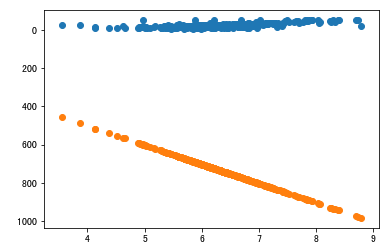

In [27]:
plot_by_k_and_b(best_k, best_b)

## 2-nd 方法 进行方向的调整

## k的变化有两种： 增大和减小
## b的变化也有两种：增大和减小

k, b这一组值我们进行变化，就有4种组合：

当，k和b沿着某个方向$d_n$变化的时候，如何，loss下降了，那么，k和b接下来就继续沿着$d_n$这个方向走，否则，我们就换一个方向

In [28]:
directions = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]


def price(x, k, b):
    return k*x + b

trying_times = 10000

best_k = random.random() * 100 - 200
best_b = random.random() * 100 - 200

next_direction = random.choice(directions)

min_cost = float('inf')

losses = []

scala = 0.3

for i in range(trying_times):
    current_direction = next_direction
    k_direction, b_direction = current_direction
    
    current_k = best_k + k_direction * scala
    current_b = best_b + b_direction * scala
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    cost = loss(list(y), price_by_random_k_and_b)
    
    if cost < min_cost: 
        min_cost = cost
        best_k, best_b = current_k,current_b
        print('在第{}， k和b更新了'.format(i))
        losses.append((i, min_cost))
        next_direction = current_direction
    else:
        next_direction = random.choice(list(set(directions) - {current_direction}))

在第0， k和b更新了
在第1， k和b更新了
在第2， k和b更新了
在第3， k和b更新了
在第4， k和b更新了
在第5， k和b更新了
在第6， k和b更新了
在第7， k和b更新了
在第8， k和b更新了
在第9， k和b更新了
在第10， k和b更新了
在第11， k和b更新了
在第12， k和b更新了
在第13， k和b更新了
在第14， k和b更新了
在第15， k和b更新了
在第16， k和b更新了
在第17， k和b更新了
在第18， k和b更新了
在第19， k和b更新了
在第20， k和b更新了
在第21， k和b更新了
在第22， k和b更新了
在第23， k和b更新了
在第24， k和b更新了
在第25， k和b更新了
在第26， k和b更新了
在第27， k和b更新了
在第28， k和b更新了
在第29， k和b更新了
在第30， k和b更新了
在第31， k和b更新了
在第32， k和b更新了
在第33， k和b更新了
在第34， k和b更新了
在第35， k和b更新了
在第36， k和b更新了
在第37， k和b更新了
在第38， k和b更新了
在第39， k和b更新了
在第40， k和b更新了
在第41， k和b更新了
在第42， k和b更新了
在第43， k和b更新了
在第44， k和b更新了
在第45， k和b更新了
在第46， k和b更新了
在第47， k和b更新了
在第48， k和b更新了
在第49， k和b更新了
在第50， k和b更新了
在第51， k和b更新了
在第52， k和b更新了
在第53， k和b更新了
在第54， k和b更新了
在第55， k和b更新了
在第56， k和b更新了
在第57， k和b更新了
在第58， k和b更新了
在第59， k和b更新了
在第60， k和b更新了
在第61， k和b更新了
在第62， k和b更新了
在第63， k和b更新了
在第64， k和b更新了
在第65， k和b更新了
在第66， k和b更新了
在第67， k和b更新了
在第68， k和b更新了
在第69， k和b更新了
在第70， k和b更新了
在第71， k和b更新了
在第72， k和b更新了
在第73， k和b更新了
在第74， k和b更新了
在第75， k和b更新了
在第76， k和b更新了
在第77， k和b

在第750， k和b更新了
在第751， k和b更新了
在第752， k和b更新了
在第753， k和b更新了
在第754， k和b更新了
在第755， k和b更新了
在第756， k和b更新了
在第757， k和b更新了
在第758， k和b更新了
在第759， k和b更新了
在第760， k和b更新了
在第761， k和b更新了
在第762， k和b更新了
在第763， k和b更新了
在第764， k和b更新了
在第765， k和b更新了
在第766， k和b更新了
在第767， k和b更新了
在第768， k和b更新了
在第769， k和b更新了
在第770， k和b更新了
在第771， k和b更新了
在第772， k和b更新了
在第773， k和b更新了
在第774， k和b更新了
在第775， k和b更新了
在第776， k和b更新了
在第777， k和b更新了


In [29]:
len(losses)

778

In [30]:
min_cost

1405.565493039782

## 3-rd 梯度下降

## 我们能不能每一次的时候，都按照能够让它Loss减小方向走？
## 都能够找到一个方向

$$ loss = \frac{1}{n} \sum_i^n (y_i - \hat{y})**2 $$
$$ loss = \frac{1}{n} \sum_i^n (y_i - (k*x_i + b))^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b))x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - (kx_i + b))$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y}_i)x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y}_i)$$



In [31]:
def partial_k(x, y, y_hat):
    gradient = 0 
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / len(y) * gradient

def partial_b(y, y_hat):
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
        
    return -2 / len(y) * gradient

In [163]:
def price(x, k, b): 
    # Operation : CNN, RNN, LSTM, Attention 比KX+B更复杂的对应关系
    return k*x + b

trying_times = 50000

min_cost = float('inf')

losses = []

scala = 0.3

k, b = random.random() * 100 - 200, random.random() * 100 - 200
# 参数初始化问题！ Weight Initizalition 问题！

best_k, best_b = None, None

learning_rate = 1e-3  # Optimizer Rate

for i in range(trying_times):
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    cost = loss(list(y), price_by_random_k_and_b)
    
    if cost < min_cost: 
       # print('在第{}， k和b更新了'.format(i))
        min_cost = cost
        best_k, best_b = k, b
        losses.append((i, min_cost))

    k_gradient = partial_k(X_rm, y, price_by_random_k_and_b) # 变化的方向
    b_gradient = partial_b(y, price_by_random_k_and_b)
    
    k = min(k + (-1 * k_gradient) * learning_rate, theshold)
    # gradient clip    
    ## 优化器: Optimizer 
    ## Adam 动量 momentum
    b = b + (-1 * b_gradient) * learning_rate

TypeError: 'function' object is not iterable

## Batch Normalization
## Weight Initization 
## Activation 

## 封装成一块一块儿的，别人用的时候，不需要重新在开始写了

In [33]:
len(losses)

50000

In [34]:
print(min_cost)

61.41748573084349


In [35]:
best_k, best_b

(15.080224731996397, -72.69812054290514)

In [36]:
def square(x): 
    return 10 * x**2 + 5 * x + 5

In [37]:
import numpy as np

In [38]:
_X = np.linspace(-100, 100)

In [39]:
_y = [square(x) for x in _X]

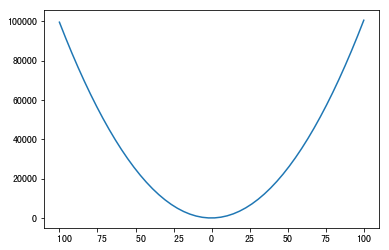

In [40]:
plt.plot(_X, _y)

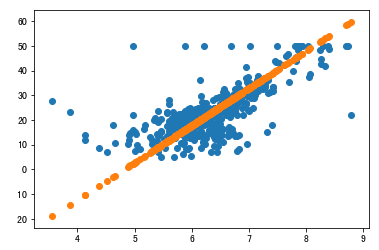

In [41]:
plot_by_k_and_b(k=best_k, b=best_b)

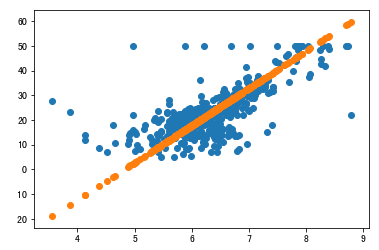

In [43]:
plot_by_k_and_b(k=best_k, b=best_b)

## Min_cost 最终能降低的 50 的样子~

## 梯度下降的方法

# Min_cost 如果我们想继续减小，该怎么办？ 

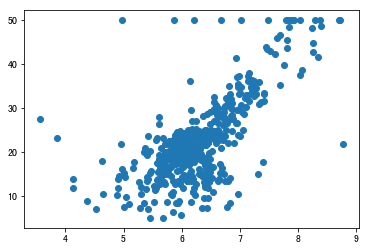

In [44]:
draw_room_and_price()

In [45]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [164]:
test_x = np.linspace(-100, 100, 1000)

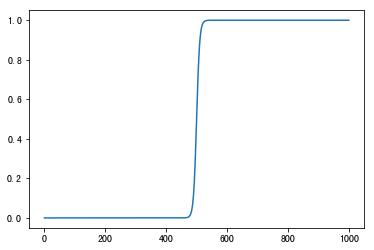

In [165]:
plt.plot(sigmoid(test_x))

## 深度学习里边，非常重要的一个理念，不断使用线性和非线性的函数进行叠加，重复下去就可以产生很复杂的函数

In [48]:
def random_linear(x):
    k, b = np.random.normal(), np.random.normal()
    
    return k * x + b

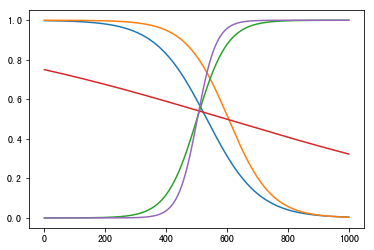

In [60]:
for _ in range(5):
    plt.plot(sigmoid(random_linear(test_x)))

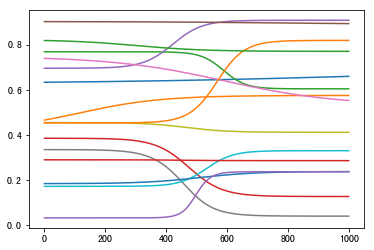

In [63]:
for _ in range(15):
    plt.plot(sigmoid(random_linear(sigmoid(random_linear(test_x)))))

## Kernel 的一个点

## 深度学习 Deep Leanring

In [94]:
def relu(x):
    return x * (x > 0) 

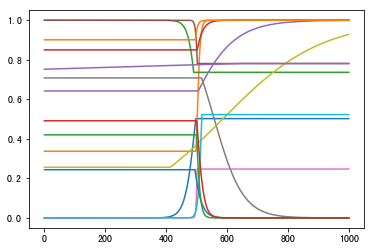

In [166]:
for _ in range(15):
    plt.plot(sigmoid(random_linear(rule(random_linear(test_x)))))

## 非线性的函数变化： activation function 

## Hinton UCSD

In [77]:
def so_many_layers(x, layers):
    if len(layers) == 1: return layers[0](x)
    
    return so_many_layers(layers[0](x), layers[1:])

y1 = kx + b
y2 = k2 * y1 + b
y3 = k3 * y2 + b
y4 = k4 * y2 + b
y5 = k5 * y2 + b
y6 = k6 * y2 + b

x => y6 好像是一个很复杂函数！

## 多层线性函数 并不能拟合出非线性函数

## 神经网络里边要有 activation function

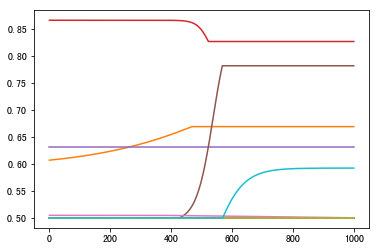

In [114]:
layers = [random_linear, relu, random_linear, sigmoid, random_linear, relu, sigmoid] * 10

for _ in range(10):
    plt.plot(so_many_layers(test_x, layers))

In [116]:
def price(x, k, b): 
    # Operation : CNN, RNN, LSTM, Attention 比KX+B更复杂的对应关系
    return k*x + b

# 每一次都要写，能不能把他们写成一个package 每次用的时候 导入进来呢？ 
def linear(x, k, b):
    return k * x + b

def sigmoid(x):  # activation cell
    return 1 / (1 + np.exp(-x))

def y(x, k1, k2, b1, b2): # price 对应的更复杂的，非线性的函数
    output1 = linear(x, k1, b1)
    output2 = sigmoid(output1)
    output3 = linear(output2, k2, b2)
    
    return output3

trying_times = 50000

min_cost = float('inf')

losses = []

scala = 0.3

# 参数初始化问题！ Weight Initizalition 问题！

k1, k2 = np.random.normal(), np.random.normal()
b1, b2 = np.random.normal(), np.random.normal() 

best_k, best_b = None, None

learning_rate = 1e-3  # Optimizer Rate

for i in range(trying_times):
    price_by_random_k_and_b = [y(r, k1, k2, b1, b2) for r in X_rm]

    cost = loss(list(y), price_by_random_k_and_b)

#     k_gradient = partial_k(X_rm, y, price_by_random_k_and_b) # 变化的方向
#     b_gradient = partial_b(y, price_by_random_k_and_b)
    ## 求导 很繁琐
    k1_gradient = partial_k1
    k2_gradient = partial_k2
    b1_gradient = partial_b1
    b2_gradient = partial_b2
    
    # 梯度下降
    k1 += -1 * k1_gradient * leanring_rate
    k2 += -1 * k2_gradient * learning_rate
    b1 += -1 * b1_gradient * learning_rate
    b2 += -1 * b2_gradient * learning_rate
    ## neural networks 
    ## 框架 deep

TypeError: 'function' object is not iterable

## Review:

```
def linear(x, k, b):
    return k * x + b

def sigmoid(x):  # activation cell
    return 1 / (1 + np.exp(-x))

def y(x, k1, k2, b1, b2): # price 对应的更复杂的，非线性的函数
    output1 = linear(x, k1, b1)
    output2 = sigmoid(output1)
    output3 = linear(output2, k2, b2)
    
    return output3
```

   $$ y = linear(\sigma(linear(x))) $$
   $$ \hat{y} = k_2 * \sigma(x * k_1 + b_1) + b_2 $$
   $$ loss(y, \hat{y}) = \frac{1}{n} \sum{(y_i - \hat{y}_i)}^2$$



## $$ \frac{\partial{loss}}{\partial{k_1}} = \frac{\partial{loss}}{\partial\hat{y}_i} * \frac{\partial{\hat{y_i}}}{\partial{\sigma}} * \frac{\partial{\sigma}}{\partial{x*k_1 + b_1}} * \frac{\partial{x*k_1 + b_1}}{\partial{k_1}}  $$

## 我们知道Loss的函数形式
## 那么，我们在定义Loss的时候，其实我们也知道Loss倒数该怎么求解

在这个Node的基础之上

我们写好很多 Linear， Sigmoid， L2Loss，Relu

打包成一个包

1. 建立网络的链接结构
+ 把x,k1, b1, k2, b2这些值输入进来
+ 选择合理的loss 

不断优化，得出k1, b1, k2, b2的值到底应该是多少~

```
def linear(x, k, b):
    return k * x + b

def sigmoid(x):  # activation cell
    return 1 / (1 + np.exp(-x))

def y(x, k1, k2, b1, b2): # price 对应的更复杂的，非线性的函数
    output1 = linear(x, k1, b1)
    output2 = sigmoid(output1)
    output3 = linear(output2, k2, b2)
    
    return output3
```

In [130]:
# def y(x, k1, k2, b1, b2): # price 对应的更复杂的，非线性的函数
#     output1 = linear(x, k1, b1)
#     output2 = sigmoid(output1)
#     output3 = linear(output2, k2, b2)

value_graph = {
    'x': ['linear'], 
    'k1': ['linear'], 
    'b1': ['linear'],
    'linear': ['sigmoid'], 
    'sigmoid': ['linear_2'],
    'k2': ['linear_2'],
    'b2': ['linear_2'],
    'linear_2': ['loss']
}

In [131]:
import networkx as nx

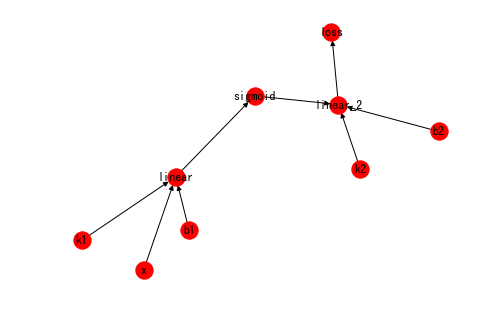

In [133]:
graph = nx.DiGraph(value_graph)
layout = nx.layout.spring_layout(graph)
nx.draw(nx.DiGraph(value_graph), layout, with_labels=True)

In [155]:
def visited_procedure(graph, postion, visited_order, step, sub_plot_index=None, colors=('red', 'green')):
    changed = visited_order[:step] if step is not None else visited_order
    before, after = colors
    color_map = [after if c in changed else before for c in graph]

    nx.draw(graph, postion, node_color=color_map, with_labels=True, ax=sub_plot_index)

In [135]:
visitor_order = [
    'x', 
    'k1',
    'b1',
    'k2', 
    'b2',
    'linear', 
    'sigmoid',
    'linear_2',
    'loss'
]

## Feedward 前导计算 做的事情就是

## 依据我们的x 和我们的此时此刻的参数集合(k1, k2, b1, b2,..)


## 计算出我们的预测的值 $\hat{y}$

## 并且，计算出此时此刻的 Loss

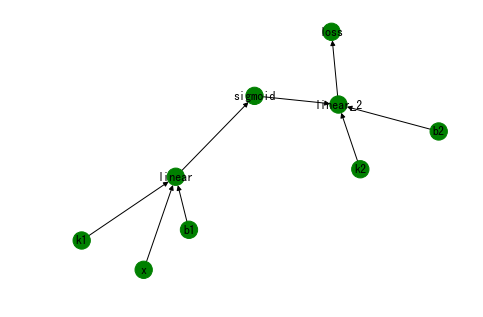

In [151]:
visited_procedure(graph, layout, visitor_order, step=9)

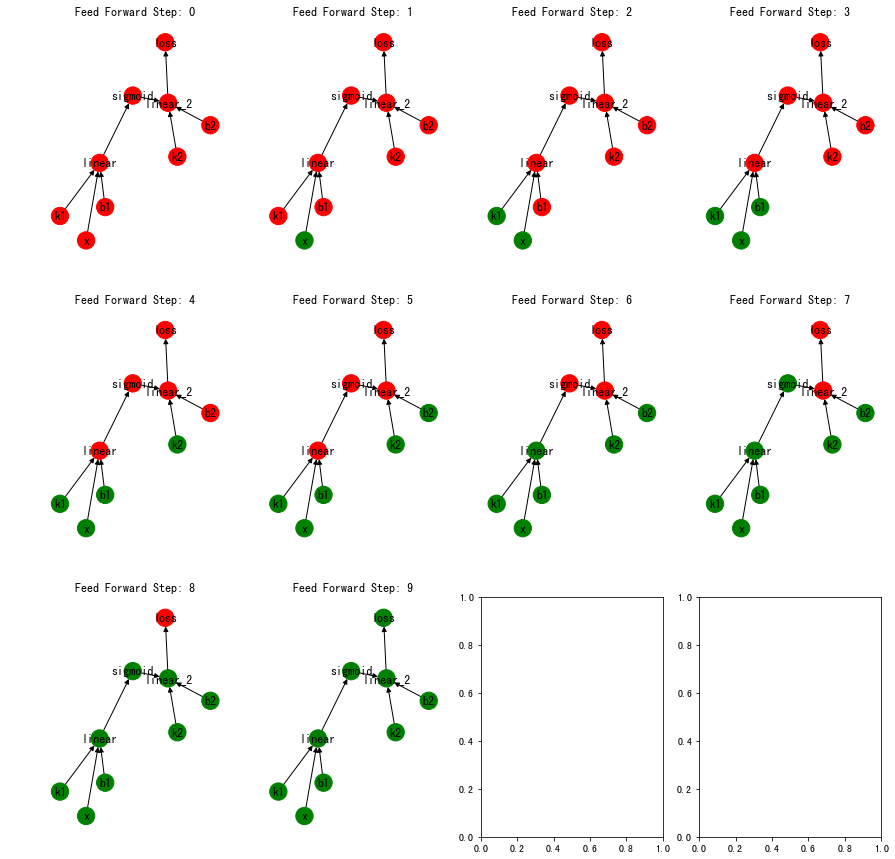

In [154]:
dimension = int(len(visitor_order)**0.5)
fig, ax = plt.subplots(dimension, dimension+1, figsize=(15,15))

for i in range(len(visitor_order) + 1):
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text('Feed Forward Step: {}'.format(i))
    visited_procedure(graph, layout, visitor_order, step=i, sub_plot_index=ax[ix])

## 前向和反向传播会不断的进行直到模型参数不更新为止吗？ 
## --yes

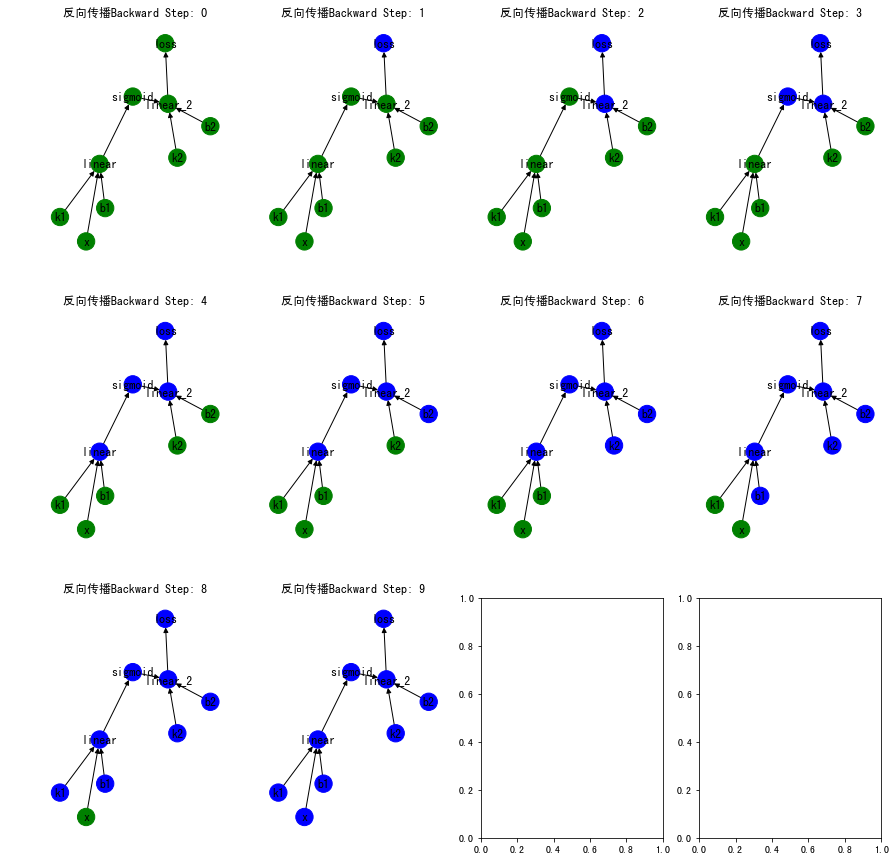

In [161]:
dimension = int(len(visitor_order)**0.5)
fig, ax = plt.subplots(dimension, dimension+1, figsize=(15,15))

for i in range(len(visitor_order) + 1):
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text('反向传播Backward Step: {}'.format(i))
    visited_procedure(graph, layout, visitor_order[::-1], step=i, sub_plot_index=ax[ix], colors=('green', 'blue'))

In [162]:
#################


def loss(y, y_hat):
    sum_ = sum([(y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)])
    return sum_ / len(y)

def loss_partial_y():
    pass

def loss_partial_y_hat():
    pass

#############


def linear(x, k, b):
    return k * x + b

def linear_partial_x(x, k, b):
    return k

def linear_partial_k(x, k, b):
    return x

def linear_partial_b(x, k, b):
    return 1

########################


def sigmoid(x):  # activation cell
    return 1 / (1 + np.exp(-x))

def sigmoid_partial(x):
    pass
    


## 老师， 在链式求导中，如果某个环节的导数是0， 整个结果都是0，对吗？
## -- 是的！ Gradient Vanishing

In [174]:
class Node:
    def __init__(self, inputs=[]):
        self.inputs = inputs
        self.outputs = []
        
        for n in self.inputs:
            n.outputs.append(self)
        
        self.value = None
        
        self.gradients = {}
        
    def forward():
        pass
    
    def backward():
        pass

In [184]:
class Placeholder(Node):
    def __init__(self):
        Node.__init__(self)
        
    def forward(self, value=None):
        if value is not None: self.value = value
    
    def backward(self):
        self.gradients = {}
        for n in self.outputs:
            self.gradents[self] = n.gradient[self] * 1
        
class Linear(Node):
    def __init__(self, x: None, weigth: None, bias: None):
        Node.__init__(self, [x, weigth, bias])
        
    def foward(self):
        k, x, b = self.inputs[1], self.inputs[0], self.inputs[2]
        self.value = k.value * x.value + b.value
        
    def backward(self):
        k, x, b = self.inputs[1], self.inputs[0], self.inputs[2]
        
        for n in self.outputs:
            grad_cost = n.gradients[self]
            
            self.gradients[k] = grad_cost * x.value
            
            self.gradients[x] = grad_cost * k.value
            
            self.gradients[b] = grad_cost * 1
    
class Sigmoid(Node):
    def __init__(self, x):
        Node.__init__(self, [x])
        self.x = self.inputs[0]
        
    def _sigmoid(self, x):
        return 1. / (1 + np.exp(-1 * x))
    
    def forward(self):
        self.value = self._sigmoid(self.x.value)
        
    def partial(self):
        return self._sigmoid(self.x.value) * (1 - self._sigmoid(self.x.value))
    
    def backward(self):
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self.x] = grad_cost * self.partial() 


class L2_LOSS(Node):
    def __init__(self, y, y_hat):
        Node.__init__(self [y, y_hat])
        self.y = y
        self.y_hat = y_hat
    
        self.y_v, self.yhat_v = np.array(self.y.value), np.array(self.y_hat.value)

    def foward(self):        
        self.value = np.mean((self.y_v - self.yhat_v) ** 2)
        
    def backward(self):
        # 1/n sum (y- yhat)**2
        self.gradients[self.y] = 2/len(self.y_v) * (self.y_v - self.yhat_v)
        self.gradients[self.y_hat] = -2 / len(self.y_v) *  (self.y_v - self.yhat_v)

In [176]:
y = [1, 2, 1, 4, 1]
yhat = [3, 2, 1, 4, 5]

In [178]:
y = np.array(y)
yhat = np.array(yhat)

In [183]:
np.mean((y - yhat) ** 2)

4.0

In [170]:
X_, y_ = data['data'], data['target']
X_rm = X[:, 5]

In [187]:
def forward_and_backward(graph_order):
    # 整体的参数就更新了一次
    for node in graph_order:
        n.foward()
    
    for node in graph_order[::-1]:
        n.backword()

## Remain 的东西是什么呢？ 

## 拓扑排序 toplogical

In [186]:
visitor_order

['x', 'k1', 'b1', 'k2', 'b2', 'linear', 'sigmoid', 'linear_2', 'loss']

In [195]:
def toplogic(graph):
    sorted_node = []
    
    while len(graph) > 0: 

        all_inputs = []
        all_outputs = []
        
        for n in graph:
            all_inputs += graph[n]
            all_outputs.append(n)
        
        all_inputs = set(all_inputs)
        all_outputs = set(all_outputs)
    
        need_remove = all_outputs - all_inputs  # which in all_inputs but not in all_outputs
    
        if len(need_remove) > 0: 
            node = random.choice(list(need_remove))
            graph.pop(node)
            sorted_node.append(node)
        
            for _, links in graph.items():
                if node in links: links.remove(node)
        else: # have cycle
            break
        
    return sorted_node

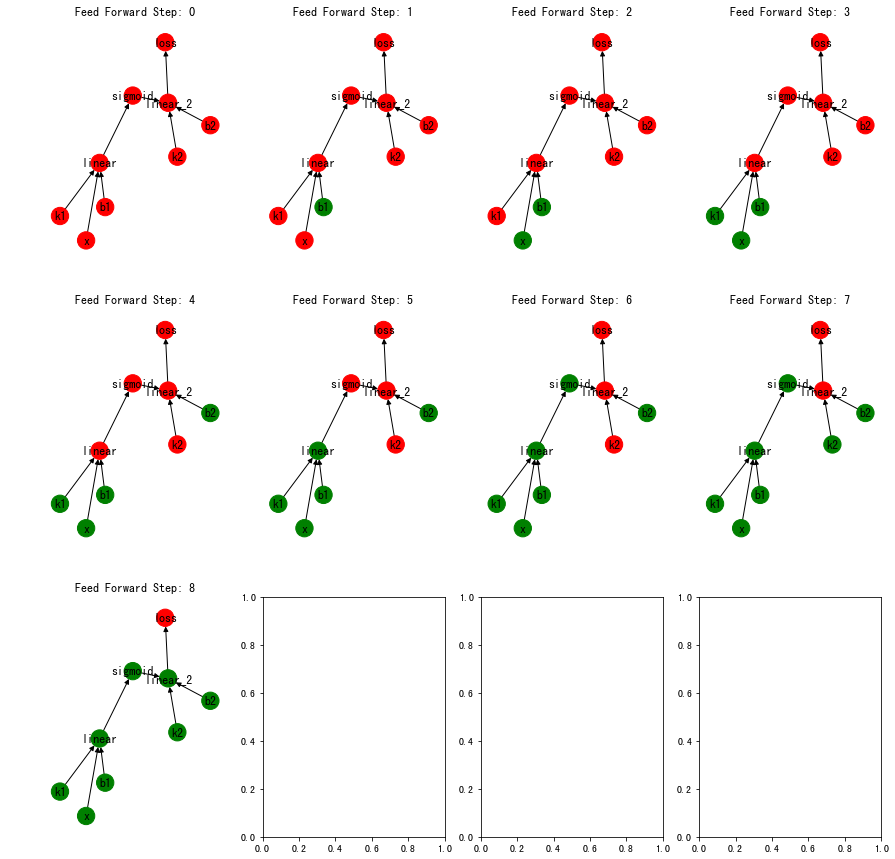

In [200]:
value_graph = {
    'x': ['linear'], 
    'k1': ['linear'], 
    'b1': ['linear'],
    'linear': ['sigmoid'], 
    'sigmoid': ['linear_2'],
    'k2': ['linear_2'],
    'b2': ['linear_2'],
    'linear_2': ['loss']
}

top_order = toplogic(value_graph)

dimension = int(len(visitor_order)**0.5)
fig, ax = plt.subplots(dimension, dimension+1, figsize=(15,15))

for i in range(len(top_order) + 1):
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text('Feed Forward Step: {}'.format(i))
    visited_procedure(graph, layout, top_order, step=i, sub_plot_index=ax[ix])

In [ ]:
def node_computing_sort():
    pass

In [171]:
#from xxxx import Linear, Sigmoid, L2_LOSS, Placeholder


data = load_boston()
X_, y_ = data['data'], data['target']
X_rm = X_[:, 5]

w1_, b1_ = np.random.normal(), np.random.normal()
w2_, b2_ = np.random.normal(), np.random.normal()

X, y = Placeholder(), Placeholder()
w1, b1 = Placeholder(), Placeholder()
w2, b2 = Placeholder(), Placeholder()

# build model
output1 = Linear(X, w1, b1)
output2 = Sigmoid(output1)
y_hat = Linear(output2, w2, b2)
cost = L2_LOSS(y, y_hat)

graph_nodes = [output1, output2, y_hat, cost]


feed_dict = {
    X: X_rm,
    y: y_,
    w1: w1_,
    w2: w2_,
    b1: b1_,
    b2: b2_
}

graph_sort = node_computing_sort(feed_dict, graph_nodes)


for e in range(epoch)
    
    forward_and_backward(graph_sort)

TypeError: Linear() takes no arguments

## 下一节课：
1. node_computing_sort实现了
2. 会增加一个CNN结构，用来实现图片的分类
3. 带领大家把我们的这个框架，发布出去，发布到pip上，然后呢，你的朋友，你的同学，就可以